# Возрождение Собора Парижской Богоматери

На этом практическом занятии мы отправимся в цифровую экспедицию, чтобы собрать Собор Парижской Богоматери заново, используя синтез современных вычислительных технологий. Мы будем:

- Обрабатывать изображения из набора данных Phototour
- Моделировать 3D-реконструкцию для создания модели облака точек
- Применять теорию вероятностей для представления неопределенности в измерениях
- Используйте простую модель машинного обучения для прогнозирования недостающих деталей

Повествование отражает нашу историю — приключение, в котором математика объединяет различные области в последовательную реставрацию утраченного шедевра.

**ОБРАТИТЕ ВНИМАНИЕ**: все нечётные (1,3,5,7,9,11) задания являются обязательными, а все чётные (2,4,6,8,10) - дополнительными. Приступайте к выполнению дополнительных заданий после того, как выполните все обязательные. (Выполнение всех ячеек с кодом также является обязательным.)

---

**Цифровая экспедиция: Восстановление Нотр-Дама**

* **1 Нотр-Дам-де-Пари: Свидетельство истории**
    Собор Парижской Богоматери, известный также как Нотр-Дам-де-Пари, является одним из самых узнаваемых символов Парижа и Франции. Его строительство началось в XII веке и продолжалось на протяжении нескольких столетий, что делает его ярким примером французской готической архитектуры. Собор имеет огромное историческое и культурное значение, являясь местом проведения коронаций, свадеб и других важных событий в истории Франции. Трагический пожар, произошедший в апреле 2019 года, нанес собору значительный ущерб, вызвав волну сочувствия и стремление к его восстановлению и сохранению для будущих поколений.
    * **Связь со сниппетами:** Сниппеты подчеркивают важность сохранения наследия Нотр-Дама перед лицом катастрофы.
    * **Понимание:** Изучение Нотр-Дама предоставляет убедительный реальный контекст для применения вычислительной математики к значимому объекту культурного наследия.

* **2 Искусство и наука фотограмметрии**
    Фотограмметрия представляет собой научный метод, позволяющий определять форму, размеры и положение объектов в пространстве по их фотографическим изображениям. Процесс включает в себя получение множества перекрывающихся изображений объекта с разных точек зрения. Затем с помощью специализированного программного обеспечения на этих изображениях идентифицируются общие точки, и на основе их смещения относительно друг друга вычисляется трехмерная структура объекта. Фотограмметрия широко используется для создания 3D-моделей зданий, ландшафтов, артефактов и других объектов.
    * **Связь со сниппетами:** Сниппеты раздела 2 явно описывают фотограмметрию как ключевую технологию, использованную для оцифровки и реконструкции Нотр-Дама.
    * **Понимание 1:** Фотограмметрия преобразует набор 2D-изображений в ценные 3D-пространственные данные.
    * **Понимание 2:** Точность полученной 3D-модели зависит от таких факторов, как качество изображений, степень их перекрытия и калибровка.

* **3 Восстановление утраченного наследия: Вычислительный подход**
    Представьте себе команду молодых исследователей, которые, используя архивные фотографии разрушенного шедевра, пытаются воссоздать его цифровую модель. Эти фотографии, полученные с помощью фотограмметрии, служат основой для их работы. Используя мощные вычислительные инструменты и математические методы, команда обрабатывает изображения, создает 3D-модель и анализирует ее геометрические свойства. В этом процессе численное интегрирование может стать ценным инструментом для извлечения информации об объеме, площади поверхности и других характеристик реконструируемого объекта. Этот сценарий демонстрирует, как вычислительные методы, включая численное интегрирование, играют важную роль в сохранении и восстановлении культурного наследия.

## Начало работы

Прежде чем приступить к работе, пожалуйста, убедитесь, что вы загрузили набор данных (или соответствующее подмножество) [отсюда](https://phototour.cs.washington.edu/datasets/). После загрузки обновите пути в ячейках ниже соответствующим образом.

Также установите необходимые библиотеки, если вы этого еще не сделали. Например:

In [2]:
%pip install numpy opencv-python matplotlib open3d scikit-learn scikit-image --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.4 MB/s eta 0:00:00


In [3]:
# Import all necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from scipy.integrate import quad

# Open3D for visualization and 3D processing
import open3d as o3d

# For additional image processing
from skimage import filters, feature

# For machine learning demonstration
from sklearn.linear_model import LinearRegression

print("Libraries imported successfully!")

Libraries imported successfully!


## Шаг 1: Обработка изображений

Мы начинаем с выбора образца изображения Собора Парижской Богоматери из набора данных. В этой ячейке мы:

- Считываем изображение
- Преобразуем его в оттенки серого
- Применяем определение границ для выделения структурных особенностей

Измените переменную `relpath` так, чтобы она указывала на вашу локальную копию изображения.

In [4]:
!unzip NotreDame.zip

Archive:  NotreDame.zip
   creating: NotreDame/
   creating: NotreDame/images/
  inflating: NotreDame/images/10190279@N06_1027171096.jpg  
  inflating: NotreDame/images/10190279@N06_1027171096.rd.jpg  
  inflating: NotreDame/images/10699036@N08_2183236005.jpg  
  inflating: NotreDame/images/10699036@N08_2183236005.rd.jpg  
  inflating: NotreDame/images/10699036@N08_2183236021.jpg  
  inflating: NotreDame/images/10699036@N08_2183236021.rd.jpg  
  inflating: NotreDame/images/11186165@N07_2297563319.jpg  
  inflating: NotreDame/images/11186165@N07_2297563319.rd.jpg  
  inflating: NotreDame/list.txt      
  inflating: NotreDame/notredame.out  
  inflating: NotreDame/README.txt    


In [5]:
from random import randrange

# Replace with the actual image file path after downloading the dataset
curr_dir = os.path.abspath(os.path.curdir)
relpath = os.path.relpath("NotreDame/images/10190279@N06_1027171096.jpg", curr_dir)
print("Sample image path:", os.path.dirname(relpath))
print(os.path.lexists(os.path.dirname(relpath)))

files = os.listdir(os.path.dirname(relpath))
print(files[:5])

relpath = os.path.join(os.path.dirname(relpath), files[randrange(len(files))])

# Check if the file exists before attempting to read it
if os.path.exists(relpath):
    img = cv2.imread(relpath)
    if img is None:
        print("Failed to read the image. Please ensure the file is a valid image.")
else:
    print(f"File not found at path: {relpath}. Please check the file path and try again.")

Sample image path: NotreDame/images
True
['10699036@N08_2183236021.jpg', '10190279@N06_1027171096.rd.jpg', '10699036@N08_2183236021.rd.jpg', '10190279@N06_1027171096.jpg', '11186165@N07_2297563319.rd.jpg']


На практике чаще всего для выделения границ изображения можно использовать готовый оптимизированный библиотечный метод, который дополнительно сделает очистку от шума и много чего [ещё](https://gregorkovalcik.github.io/opencv_contrib/tutorial_py_canny.html).

В данном случае важно правильно подобрать значения аргументов функции cv2.Canny.

На самом деле, внутри своей реализации метод cv2.Canny также делает интегрирование, но более специфическим для изображений способом.

In [6]:
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use Canny edge detection
edges = cv2.Canny(gray, 100, 200)

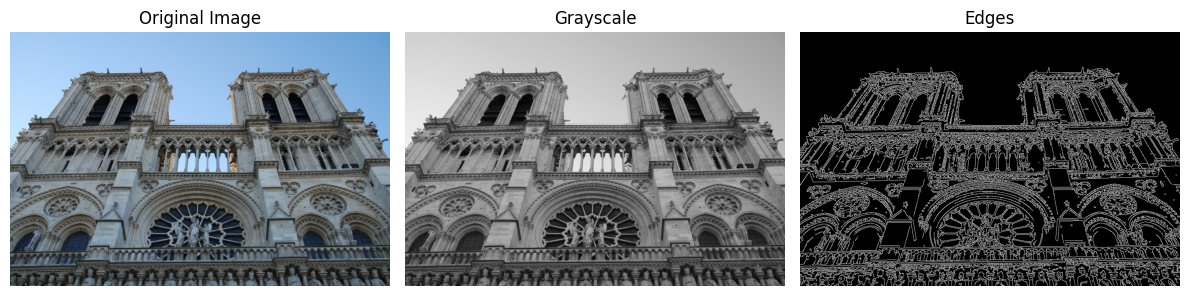

In [7]:
# Plot the original, grayscale, and edge-detected images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.axis('off')

plt.tight_layout()
plt.show()

Попробуем теперь применить собственные методы интегрирования для нахождения границ на изображении

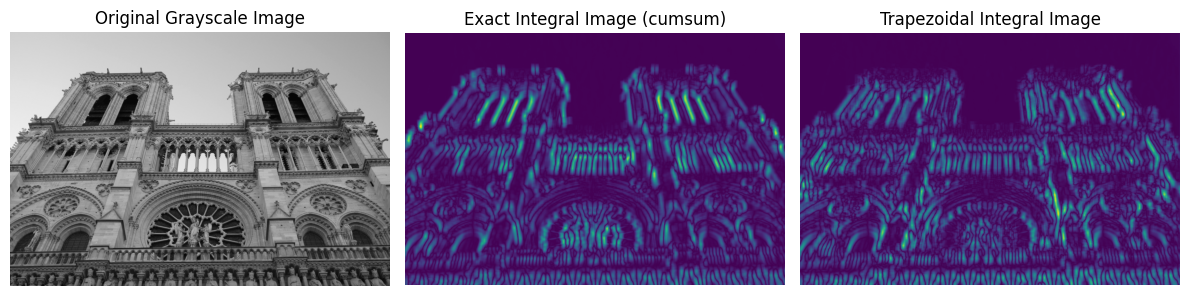

In [8]:
import numpy as np
import cv2
from scipy.integrate import cumulative_trapezoid
import matplotlib.pyplot as plt

def compute_integral_trap(gray_image):
    """
    Compute an "integral image" approximation for a grayscale image using the cumulative trapezoidal rule.
    The integration is computed first along the rows and then along the columns.

    Parameters:
      gray_image : 2D numpy array representing the grayscale image.

    Returns:
      integral_img : 2D numpy array with the cumulative trapezoidal integration.
    """
    # Integrate along rows (vertical integration); setting initial=0 ensures the output is the same shape.
    int_rows = cumulative_trapezoid(gray_image, dx=1, axis=0, initial=0)
    # Now integrate the result along columns (horizontal integration)
    integral_img = cumulative_trapezoid(int_rows, dx=1, axis=1, initial=0)

    return integral_img


def compute_integral(image):
    """
    Compute the integral (summed-area) image for each color channel.
    The output 'integral' has shape (H+1, W+1, C) where the extra row and
    column (filled with zeros) allow rapid rectangle sum computation.
    """
    H, W, C = image.shape
    # Create a padded integral image with zeros in the first row and column.
    integral = np.zeros((H + 1, W + 1, C), dtype=np.float64)
    for c in range(C):
        # For each channel, compute cumulative sums along rows and columns.
        integral[1:, 1:, c] = np.cumsum(np.cumsum(image[:, :, c], axis=0), axis=1)
    return integral

def sum_region(integral, top, left, height, width):
    """
    Compute the sum over a rectangular region in the original image using its integral image.

    Parameters:
      integral - the padded integral image of shape (H+1, W+1, C)
      top, left - the top-left coordinates (in the original image coordinate system)
      height, width - size of the rectangular region

    Returns:
      A 1D array (for each channel) with the summed intensity.

    The region covered in the original image is:
      rows:    top       to top+height-1
      columns: left      to left+width-1
    """
    # Because the integral image is padded, the sum is calculated as:
    # S = I[bottom, right] - I[top, right] - I[bottom, left] + I[top, left]
    bottom = min(top + height, integral.shape[0] - 1)
    right = min(left + width, integral.shape[1] - 1)
    return (integral[bottom, right, :] -
            integral[top, right, :] -
            integral[bottom, left, :] +
            integral[top, left, :])

def vertical_edge_detection(image, filter_width, filter_height, integration_method):
    """
    Detect vertical edges in a color image using a box filter whose left and right
    halves are summed separately (using the integral image) and then differenced.

    Parameters:
      image        - Input color image (H, W, 3)
      filter_width - Total width of the sliding filter window
      filter_height- Height of the filter window

    Returns:
      edge_map - A 2D edge response image computed over all valid window positions.
    """
    H, W, C = image.shape
    integral = integration_method(image)

    # The output edge response will be computed only where a full window fits.
    out_height = H - filter_height + 1
    out_width = W - filter_width + 1
    edge_map = np.zeros((out_height, out_width), dtype=np.float64)

    # Loop over every position (top-left corner) where the filter fits.
    for y in range(out_height):
        for x in range(out_width):
            # Calculate the sum for the left half of the window.
            left_sum = sum_region(integral, y, x, filter_height, filter_width // 2)
            # Calculate the sum for the right half of the window.
            right_sum = sum_region(integral, y, x + filter_width // 2, filter_height,
                                   filter_width - filter_width // 2)
            # Compute the difference per channel.
            diff = right_sum - left_sum
            # Combine responses from all channels (Euclidean norm).
            magnitude = np.sqrt(np.sum(diff ** 2))
            edge_map[y, x] = magnitude

    # Normalize the edge map to the range [0, 255] for visualization.
    edge_map = edge_map - edge_map.min()
    if edge_map.max() > 0:
        edge_map = edge_map / edge_map.max() * 255
    return edge_map.astype(np.uint8)



# For demonstration, load a grayscale image.
img = cv2.imread(relpath, cv2.IMREAD_GRAYSCALE)
# if img is None:
#     print("Error: Image not found. Please ensure 'image.jpg' is available.")
#     exit(1)

# integral_img_trap = compute_integral_trap(img)

# Also compute the exact integral image using np.cumsum for comparison.
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Set filter dimensions. Adjust these based on image resolution and desired sensitivity.
filter_width = 20
filter_height = 20

# Compute the vertical edge map.
edge_map_cumsum = vertical_edge_detection(img_rgb, filter_width, filter_height, compute_integral)
edge_map_trap = vertical_edge_detection(img_rgb, filter_width, filter_height, compute_integral_trap)


# integral_img_exact = np.cumsum(np.cumsum(img, axis=0), axis=1)

# For visualization, let's see the differences.
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(edge_map_cumsum, cmap='viridis')
plt.title("Exact Integral Image (cumsum)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(edge_map_trap, cmap='viridis')
plt.title("Trapezoidal Integral Image")
plt.axis("off")

plt.tight_layout()
plt.show()

### Анализ. Задание 1.

Сделайте вывод о применении методов интегрирования для нахождении границ объектов на изображениях. Как нужно дополнить методы интегрирования, чтобы получить лучший результат?

Интегральное изображение (вычисляемое через `np.cumsum`) - это быстрый способ суммировать пиксели в прямоугольных областях, что полезно для обнаружения границ с помощью фильтров (например, для выделения вертикальных граней). Метод трапеций (`scipy.integrate.cumulative_trapezoid`) для этой задачи не подходит. Чтобы улучшить обнаружение границ, можно использовать более сложные фильтры (не только вертикальные), гауссовское сглаживание для удаления шума, анализ в разных масштабах и постобработку (подавление немаксимумов, пороговую обработку). Также можно рассмотреть возможность использования стандартных алгоритмов, таких как Canny. Интегральное изображение само по себе только ускоряет вычисления, а качество обнаружения границ зависит от используемых фильтров и постобработки.

In [9]:
# Код. Задание 2*.
# Выполняйте это задание только после того, как выполните все остальные задания
# Попробуйте реализовать предлагаемый Вами подход здесь

...

Ellipsis

## Step 2: 3D Reconstruction

For 3D reconstruction, a full-scale Structure-from-Motion (SfM) pipeline would typically involve multiple images and feature matching (using tools such as COLMAP or OpenMVG). For illustration, we simulate a reconstructed point cloud using Open3D.

In practice, you’d replace this simulation with a true reconstruction process that converts your image data to a point cloud.

3D реконструкция объектов по их изображениям - это частный случай фотограмметрии. Фотограмметрия используется и в архитектуре, для восстановления изображений зданий по их фотографиям.

Вдохновиться примером фотограмметрии собора Нотр-Дам-де-Пари можно [тут](https://www.reddit.com/r/photogrammetry/comments/1hhpj47/my_photogrammetry_scan_of_notredame_de_paris/). (Автор сам делал фотографии с земли, после чего строил карту высот по точкам и в конце накладывал текстуры.)

Исходный набор данных уже содержит предобработанный файл с точками, полученными по всем точкам всех изображений с учётом места съемки. Файл записан в формате [Bundler](http://phototour.cs.washington.edu/bundler/bundler-v0.3-manual.html#S6). Приведённый в следующей ячейке код читает данные этого файла.

Данные для такого файла рассчитываются при помощи многих методов, включая стерео-зрение, которое мы уже рассматривали на практическом занятии 5.

In [1]:
def load_bundle_file(filename):
    """
    Parse a Bundler output file and return lists of camera parameters and 3D points.

    Returns:
        cameras (list): Each entry is a dict with keys:
                        'focal' : focal length,
                        'k1' and 'k2' : radial distortion coefficients,
                        'R'     : 3x3 rotation matrix (numpy array),
                        't'     : translation vector (numpy array),
                        'C'     : computed camera center (numpy array)
        points (list): Each entry is a dict with keys:
                        'coordinates' : (X, Y, Z) as a numpy array,
                        'color'       : (R, G, B) as a numpy array,
                        'views'       : list of view observations (each is a dict with camera index,
                                        feature index and image coordinates (x, y))
    """
    with open(filename, 'r') as f:
        # Read and validate header
        header = f.readline().strip()
        if not header.startswith("# Bundle file"):
            raise ValueError("The file does not appear to be in Bundler format.")

        # Read the number of cameras and points
        line = f.readline().strip()
        num_cameras, num_points = map(int, line.split())

        cameras = []
        for i in range(num_cameras):
            # Read camera intrinsics: focal length and distortion coefficients.
            parts = f.readline().split()
            focal = float(parts[0])
            k1 = float(parts[1])
            k2 = float(parts[2])

            # Read the 3x3 rotation matrix (row by row)
            R_rows = []
            for _ in range(3):
                row = list(map(float, f.readline().split()))
                R_rows.append(row)
            R = np.array(R_rows)

            # Read the translation vector
            t = np.array(list(map(float, f.readline().split())))

            # Compute the camera center: C = - R^T * t.
            # (Bundler output is such that a 3D point in camera space is given by: X_camera = R * X_world + t.)
            C = -np.dot(R.T, t)

            cameras.append({
                'focal': focal,
                'k1': k1,
                'k2': k2,
                'R': R,
                't': t,
                'C': C
            })

        points = []
        for i in range(num_points):
            # Read the 3D point coordinates
            coords = np.array(list(map(float, f.readline().split())))

            # Read the point color (RGB)
            color = np.array(list(map(int, f.readline().split())))

            # Read the view list: starts with the number of observations followed by groups of 4 values.
            view_data = f.readline().split()
            num_views = int(view_data[0])
            views = []
            index = 1  # starting index for view tuples in view_data
            for _ in range(num_views):
                cam_idx = int(view_data[index])
                feat_idx = int(view_data[index + 1])
                x = float(view_data[index + 2])
                y = float(view_data[index + 3])
                views.append({
                    'camera_index': cam_idx,
                    'feature_index': feat_idx,
                    'x': x,
                    'y': y
                })
                index += 4

            points.append({
                'coordinates': coords,
                'color': color,
                'views': views
            })

    return cameras, points

Построим визуализацию точек, полученных из всех изображений в файле

In [10]:
# For demonstration, we simulate a point cloud
pcd = o3d.geometry.PointCloud()

# Load points from the file "NotreDame\notredame.out"
curr_dir = os.path.abspath(os.path.curdir)
relpath = os.path.join(curr_dir, "NotreDame", "notredame.out")

print("Points file path:", relpath)

cameras, points = load_bundle_file(relpath)
point_coordinates = [point['coordinates'] for point in points]


pcd.points = o3d.utility.Vector3dVector(np.array(point_coordinates))

# Visualize the point cloud
o3d.visualization.draw_geometries([pcd])
# Save the point cloud to a file
o3d.io.write_point_cloud("notredame.ply", pcd)


print("Simulated 3D point cloud generated.")

Points file path: /content/NotreDame/notredame.out
[Open3D WARNING] GLFW Error: Failed to detect any supported platform
[Open3D WARNING] GLFW initialized for headless rendering.
[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.
Simulated 3D point cloud generated.


Text(0.5, 0.92, '3D Point Cloud Visualization')

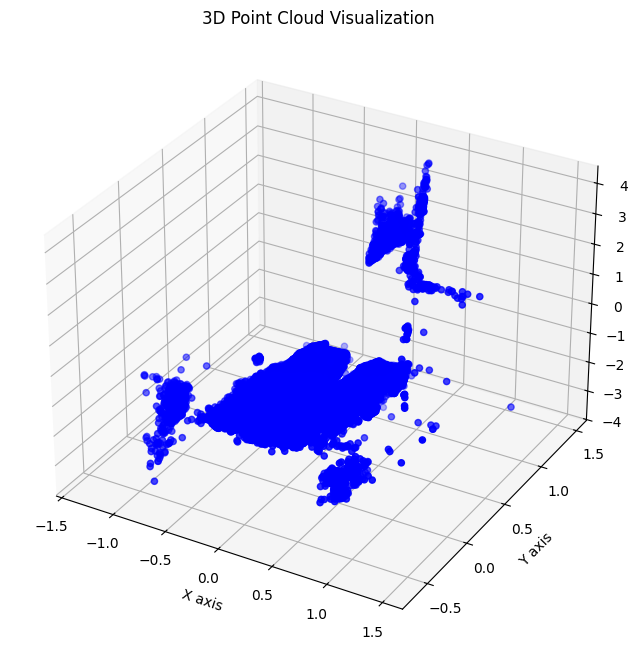

In [11]:
# Now let's visualize with matplotlib
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x_points = np.array(point_coordinates)[:, 0]
y_points = np.array(point_coordinates)[:, 1]
z_points = np.array(point_coordinates)[:, 2]
ax.scatter(x_points, y_points, z_points, c='b', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Point Cloud Visualization')

In [12]:
import numpy as np
import open3d as o3d
from scipy.spatial import Delaunay
from scipy.integrate import dblquad
from scipy.interpolate import LinearNDInterpolator


# Load a point cloud
pcd = o3d.io.read_point_cloud("notredame.ply")
points = np.asarray(pcd.points)

# --- Improved Double Integral Method ---
# Create a Delaunay triangulation
tri = Delaunay(points[:, :2])

# Create an interpolator
interp_z = LinearNDInterpolator(tri, points[:, 2])


# Define the function to integrate using interpolation
def integrand(x, y):
    z = interp_z(x, y)
    if np.isnan(z):
        return 0  # Return 0 if outside the triangulation
    return z


# Define the bounds of the integration
x_min, y_min = np.min(points[:, :2], axis=0)
x_max, y_max = np.max(points[:, :2], axis=0)

# Perform the double integral
volume, error = dblquad(
    integrand, x_min, x_max, lambda x: y_min, lambda x: y_max
)

print(f"Estimated volume (Double Integral): {volume}")

/usr/local/lib/python3.11/dist-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.11/dist-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


KeyboardInterrupt: 

In [ ]:
# Monte-Carlo method for volume estimation
def monte_carlo_volume(points, num_samples=100000):
    x_min, y_min, z_min = np.min(points, axis=0)
    x_max, y_max, z_max = np.max(points, axis=0)

    samples = np.random.uniform([x_min, y_min, z_min], [x_max, y_max, z_max], (num_samples, 3))
    delaunay_2d = Delaunay(points[:, :2])  # Create Delaunay triangulation using only x and y coordinates
    inside_count = np.sum(delaunay_2d.find_simplex(samples[:, :2]) >= 0)

    bounding_volume = (x_max - x_min) * (y_max - y_min) * (z_max - z_min)
    volume_monte_carlo = bounding_volume * (inside_count / num_samples)

    return volume_monte_carlo

volume_monte_carlo = monte_carlo_volume(points)
print(f"Estimated volume using Monte-Carlo method: {volume_monte_carlo}")

### Задание 3. Анализ

В чем, по Вашему мнению, заключается основная трудность при нахождении объемов объектов по 3D реконструкциям?

Как можно улучшить получаемые результаты?

Главная трудность в определении объёмов по 3D-реконструкциям — неоднородность и шум в данных. Для улучшения результатов необходимо повышать качество самой реконструкции, использовать более точные методы интерполяции и фильтровать шумы, а также применять комбинированные методы и проверять результаты.

In [ ]:
# Код. Задание 4*.
# Выполняйте это задание только после того, как выполните все остальные задания
# Попробуйте реализовать предлагаемый Вами подход здесь

...

## Шаг 3: Включение неопределенности и теории вероятностей

Реконструкции реального мира содержат неопределенности. Чтобы учесть это, мы сопоставляем значение неопределенности с каждой точкой в нашем облаке.

Здесь мы присваиваем каждой точке случайное значение неопределенности и используем цветовую карту, чтобы визуализировать, где реконструкция может быть менее или более надежной.

В целом, расчёт интеграла очень часто встречается в теории вероятности, например, плотность вероятности случайной величины - это и есть интеграл.

In [13]:
# Simulate an uncertainty value (between 0 and 1) for each point
uncertainty = np.random.rand(len(points))

# Create a color map based on uncertainty (using the viridis colormap)
colors = plt.cm.viridis(uncertainty)[:, :3]
pcd.colors = o3d.utility.Vector3dVector(colors)

# Visualize the point cloud with uncertainty colors
o3d.visualization.draw_geometries([pcd])

print("Uncertainty mapping applied to the point cloud.")

[Open3D WARNING] GLFW initialized for headless rendering.
[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.
Uncertainty mapping applied to the point cloud.


Теперь посмотрим как ещё могут быть применены неопределённости к расчёту объема общей неопределённости в реконструированном объекте.

In [14]:
import numpy as np
from scipy.stats import multivariate_normal
from scipy.integrate import nquad

# Generate synthetic 3D points with uncertainties (covariance matrices)
np.random.seed(42)
n_points = 100
points = np.random.randn(n_points, 3)  # 3D points (mean positions)

# Define uncertainties (covariance matrices for each point)
# Example: Diagonal covariance (variances for x, y, z)
uncertainties = np.abs(np.random.rand(n_points, 3)) * 0.5  # Shape: (n_points, 3)

# Define a 3D region of interest [a, b] × [c, d] × [e, f]
region = [[-1, 1], [-1, 1], [-1, 1]]  # Cuboid from (-1, -1, -1) to (1, 1, 1)

In [15]:
# --------------------------------------------------------------------------------
# Method 1: Monte Carlo Integration (Scalable for 3D)
# --------------------------------------------------------------------------------
def monte_carlo_probability(points, uncertainties, region, n_samples=10_000):
    # Randomly sample points from the Gaussian mixture
    samples = []
    for i in range(n_points):
        mean = points[i]
        cov = np.diag(uncertainties[i])  # Diagonal covariance matrix
        samples.append(multivariate_normal.rvs(mean=mean, cov=cov, size=n_samples // n_points))
    samples = np.vstack(samples)

    # Check if samples are within the region
    in_region = (
        (samples[:, 0] >= region[0][0]) & (samples[:, 0] <= region[0][1]) &
        (samples[:, 1] >= region[1][0]) & (samples[:, 1] <= region[1][1]) &
        (samples[:, 2] >= region[2][0]) & (samples[:, 2] <= region[2][1])
    )
    return np.mean(in_region)

# --------------------------------------------------------------------------------
# Method 2: Direct Integration (Accurate but Slow for Large Datasets)
# --------------------------------------------------------------------------------
def gaussian_mixture_pdf(x, y, z, points, uncertainties):
    pdf = 0.0
    for i in range(len(points)):
        mean = points[i]
        cov = np.diag(uncertainties[i])
        rv = multivariate_normal(mean=mean, cov=cov)
        pdf += rv.pdf([x, y, z])
    return pdf / len(points)  # Normalize

In [16]:
# Если выполняется больше 3 минут, то в коде ошибка, можете переходить к следующим заданиям или попробовать исправить код
# Integrate over the region
integral, _ = nquad(
    gaussian_mixture_pdf,
    ranges=region,
    args=(points, uncertainties),
    opts={'limit': 2}  # Increase for accuracy
)

/usr/local/lib/python3.11/dist-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The maximum number of subdivisions (2) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


KeyboardInterrupt: 

In [17]:
# --------------------------------------------------------------------------------
# Compare Results
# --------------------------------------------------------------------------------
# Empirical probability (fraction of original points in the region)
empirical_prob = np.mean(
    (points[:, 0] >= region[0][0]) & (points[:, 0] <= region[0][1]) &
    (points[:, 1] >= region[1][0]) & (points[:, 1] <= region[1][1]) &
    (points[:, 2] >= region[2][0]) & (points[:, 2] <= region[2][1])
)

In [18]:
# Monte Carlo estimate
mc_prob = monte_carlo_probability(points, uncertainties, region)

In [20]:

print(f"Empirical Probability: {empirical_prob:.4f}")
print(f"Monte Carlo Estimate: {mc_prob:.4f}")
# print(f"Direct Integration Estimate: {integral:.4f}")

Empirical Probability: 0.3700
Monte Carlo Estimate: 0.2618


Этот подход использует интегральное исчисление для количественной оценки неопределенности в трехмерных облаках точек, что делает его незаменимым для робототехники, лидарных данных и пространственной статистики.

### Задание 5. Анализ

Как, используя полученные результаты, можно улучшить качество 3D-реконструкции собора? Какие трудности Вы ожидаете? Как бы Вы предложили их решить?

Разница между эмпирической вероятностью и оценкой Монте-Карло указывает на то, что измерительные ошибки и шум существенно влияют на реконструкцию. Для улучшения качества 3D-реконструкции собора можно предпринять следующие шаги:

- **Калибровка измерений:** Уточнить модель неопределённостей, чтобы корректно учитывать ошибки.
- **Фильтрация и взвешивание данных:** Отфильтровать шумные точки и использовать более надёжные данные с большим весом.
- **Итеративное уточнение модели:** Постепенно строить базовую модель с высококачественными данными, добавляя затем данные с большей неопределённостью.
- **Локальная обработка и оптимизация:** Разбить сложные области на части для локальной обработки и использовать параллельные вычисления для ускорения расчетов.

In [ ]:
# Код. Задание 6*.
# Выполняйте это задание только после того, как выполните все остальные задания
# Попробуйте реализовать предлагаемый Вами подход здесь

...

## Шаг 4: Интегрирование и машинное обучение

Недостающие или неопределенные данные в модели могут быть уточнены с помощью машинного обучения. В этой ячейке мы моделируем регрессионный эксперимент, который предсказывает "глубину" (или другую непрерывную переменную) на основе 2D-объектов.

Представьте, что эти объекты получены в результате обработки изображений. Здесь мы:

- Создаем синтетические 2D-точки данных
- Определяем истинную взаимосвязь (функцию от x и y)
- Намеренно маскируем некоторые данные, чтобы имитировать пробелы
- Обучаем модель линейной регрессии для прогнозирования глубины
- Сравниваем прогнозы с истинными значениями

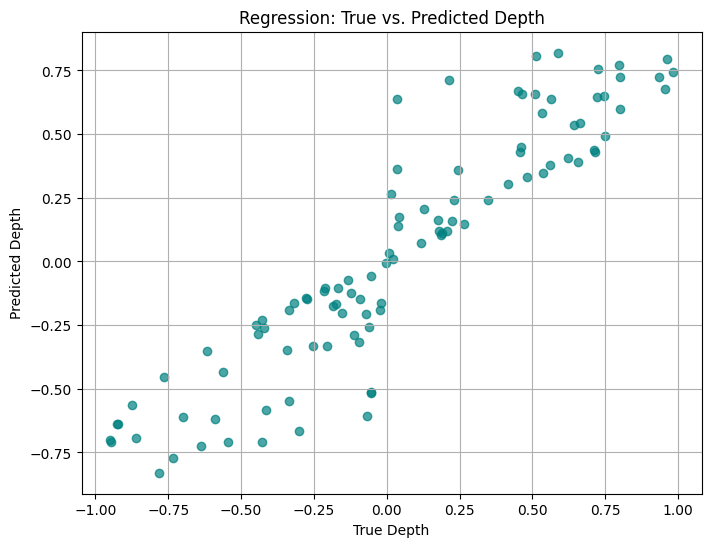

Regression model trained and predictions generated.


In [21]:
np.random.seed(0)

# Simulate 100 random 2D feature coordinates (e.g., x, y from the image)
X = np.random.rand(100, 2)

# Define a true depth function, for instance: depth = sin(pi*x) * cos(pi*y)
def true_depth(x, y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

y_true = np.array([true_depth(pt[0], pt[1]) for pt in X])

# Introduce missing values in about 30% of the data to simulate measurement gaps
mask = np.random.choice([True, False], size=y_true.shape, p=[0.7, 0.3])
X_train = X[mask]
y_train = y_true[mask]

# Train a simple linear regression model using the available data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the full dataset
y_pred = model.predict(X)

# Plot the true vs. predicted depths
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.7, color='teal')
plt.xlabel("True Depth")
plt.ylabel("Predicted Depth")
plt.title("Regression: True vs. Predicted Depth")
plt.grid(True)
plt.show()

print("Regression model trained and predictions generated.")

### Задание 7. Анализ

Как можно применить полученные результаты к реальным данным из предыдущих разделов?

Регрессия может помочь "достроить" 3D-модель: предсказать глубину (Z) там, где она неизвестна, по известным X, Y или другим признакам, или сгладить поверхность. Для сложных форм нужна нелинейная регрессия.

In [ ]:
# Код. Задание 8*.
# Выполняйте это задание только после того, как выполните все остальные задания
# Попробуйте реализовать предлагаемый Вами подход здесь

...

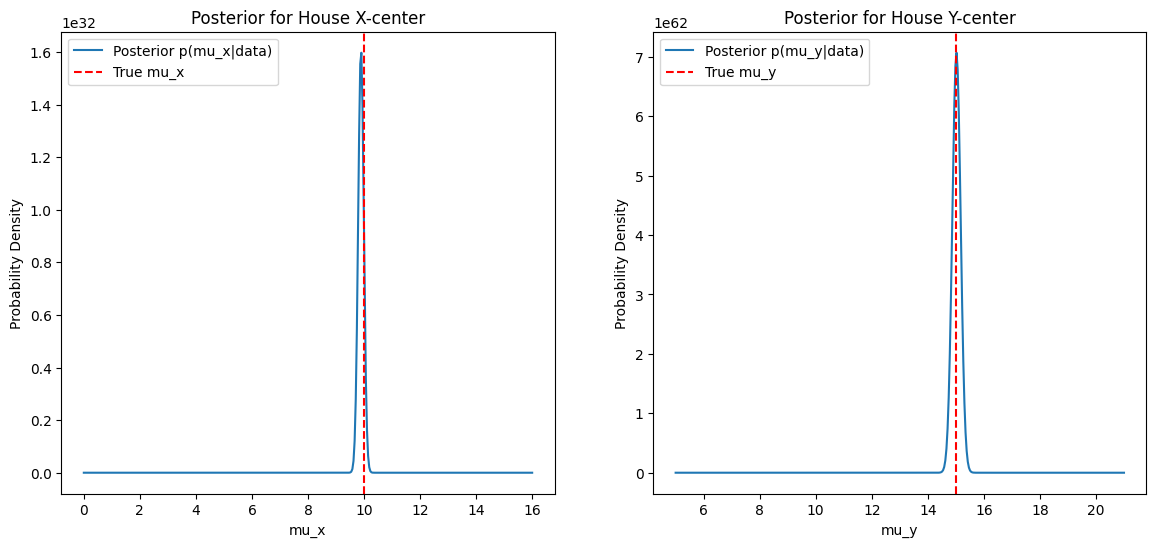

Probability that house x-center mu_x > 9 given data: 40348268818505767948602948190208.000


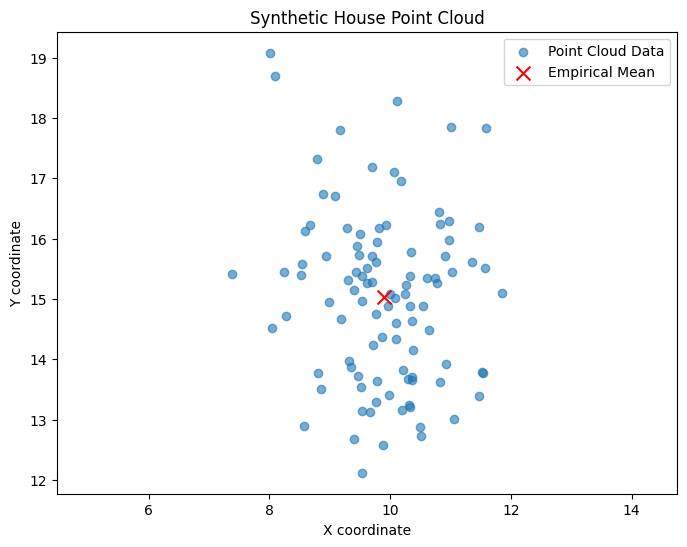

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

# ---------------------------
# 1. Generate Synthetic Point Cloud Data
# ---------------------------
# (For illustration, we simulate the house's facade as a set of 2D points.)
np.random.seed(42)
true_mu_x = 10.0     # True x-center of the house
true_mu_y = 15.0     # True y-center of the house
sigma_x = 1.0        # Noise (measurement error) in x
sigma_y = 1.5        # Noise in y
N_points = 100       # Number of points in the cloud

# Each coordinate is generated from a Gaussian distribution centered at the true value.
x_data = np.random.normal(true_mu_x, sigma_x, N_points)
y_data = np.random.normal(true_mu_y, sigma_y, N_points)

# ---------------------------
# 2. Define a Bayesian Model for the House Center
# ---------------------------
# We assume that the observed data in each dimension is generated by:
#   x_i ~ N(mu_x, sigma_x)   and   y_i ~ N(mu_y, sigma_y)
# with a prior,
#   mu_x ~ N(prior_mu_x, tau_x)   and   mu_y ~ N(prior_mu_y, tau_y)
# Our goal is to compute the posterior p(mu | data) for each coordinate.
#
# In Bayesian inference, we have:
#   p(mu | data) ∝ p(data | mu) * p(mu)
#
# Since p(data | mu) = ∏ᵢ N(data_i | mu, sigma)
# and both likelihood and prior are continuous,
# the normalization constant (marginal likelihood) is
#   p(data) = ∫ p(data | mu) p(mu) dmu
# Numerical integration (our "integral") is used to compute this constant.

# Prior parameters for mu_x and mu_y:
prior_mu_x = 8.0    # Our prior guess for the x-center
tau_x = 2.0         # Prior standard deviation for mu_x
prior_mu_y = 13.0   # Prior guess for the y-center
tau_y = 2.0         # Prior standard deviation for mu_y

# Define the log of the unnormalized posterior for one coordinate.
def log_unnormalized_posterior(mu, data, sigma, prior_mu, tau):
    # log_likelihood = ∑ log [N(data_i | mu, sigma)]
    log_likelihood = np.sum(norm.logpdf(data, loc=mu, scale=sigma))
    # log_prior = log [N(mu | prior_mu, tau)]
    log_prior = norm.logpdf(mu, loc=prior_mu, scale=tau)
    return log_likelihood + log_prior

# For numerical stability, we compute on a grid first to determine a scaling constant.
def compute_scaling_constant(data, sigma, prior_mu, tau, grid_min, grid_max, num_points=1000):
    mu_grid = np.linspace(grid_min, grid_max, num_points)
    log_vals = [log_unnormalized_posterior(mu, data, sigma, prior_mu, tau) for mu in mu_grid]
    return np.max(log_vals)

# Define a function for the unnormalized posterior (in standard space).
def unnormalized_posterior(mu, data, sigma, prior_mu, tau, c):
    # We subtract a constant c from the log posterior to avoid numerical underflow.
    return np.exp(log_unnormalized_posterior(mu, data, sigma, prior_mu, tau) - c)

# ---------------------------
# 3. Inference for the x-coordinate (mu_x)
# ---------------------------
# Define a grid where we expect mu_x to lie.
grid_min_x = prior_mu_x - 4 * tau_x
grid_max_x = prior_mu_x + 4 * tau_x
# Determine a scaling constant to keep values numerically stable.
c_x = compute_scaling_constant(x_data, sigma_x, prior_mu_x, tau_x, grid_min_x, grid_max_x)

# Compute the marginal likelihood by integrating the unnormalized posterior over mu.
marginal_x, err_x = quad(lambda u: unnormalized_posterior(u, x_data, sigma_x, prior_mu_x, tau_x, c_x), -np.inf, np.inf)
# The true marginal likelihood is: marginal_x * exp(c_x)

# Define the normalized posterior for mu_x.
def posterior_mu(mu, data, sigma, prior_mu, tau, c, marginal):
    return np.exp(log_unnormalized_posterior(mu, data, sigma, prior_mu, tau) - c) / marginal

# Evaluate the posterior over a grid.
mu_x_values = np.linspace(grid_min_x, grid_max_x, 400)
posterior_x_vals = [posterior_mu(mu, x_data, sigma_x, prior_mu_x, tau_x, c_x, marginal_x) for mu in mu_x_values]

# ---------------------------
# 4. Inference for the y-coordinate (mu_y)
# ---------------------------
grid_min_y = prior_mu_y - 4 * tau_y
grid_max_y = prior_mu_y + 4 * tau_y
c_y = compute_scaling_constant(y_data, sigma_y, prior_mu_y, tau_y, grid_min_y, grid_max_y)
marginal_y, err_y = quad(lambda u: unnormalized_posterior(u, y_data, sigma_y, prior_mu_y, tau_y, c_y), -np.inf, np.inf)
mu_y_values = np.linspace(grid_min_y, grid_max_y, 400)
posterior_y_vals = [posterior_mu(mu, y_data, sigma_y, prior_mu_y, tau_y, c_y, marginal_y) for mu in mu_y_values]

# ---------------------------
# 5. Visualizations
# ---------------------------
# Plot the posterior distributions for mu_x and mu_y.
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(mu_x_values, posterior_x_vals, label='Posterior p(mu_x|data)')
plt.axvline(true_mu_x, color='r', linestyle='--', label='True mu_x')
plt.xlabel('mu_x')
plt.ylabel('Probability Density')
plt.title('Posterior for House X-center')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mu_y_values, posterior_y_vals, label='Posterior p(mu_y|data)')
plt.axvline(true_mu_y, color='r', linestyle='--', label='True mu_y')
plt.xlabel('mu_y')
plt.ylabel('Probability Density')
plt.title('Posterior for House Y-center')
plt.legend()

plt.show()

# Compute a conditional probability:
# For example, what is the probability that mu_x > 9 given the observed data?
cond_prob_x, err_cond_x = quad(lambda u: posterior_mu(u, x_data, sigma_x, prior_mu_x, tau_x, c_x, marginal_x), 9, np.inf)
print(f"Probability that house x-center mu_x > 9 given data: {cond_prob_x:.3f}")

# Visualize the synthetic 2D point cloud and the empirical (sample) mean.
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, alpha=0.6, label='Point Cloud Data')
plt.scatter(np.mean(x_data), np.mean(y_data), color='r', marker='x', s=100, label='Empirical Mean')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Synthetic House Point Cloud')
plt.legend()
plt.axis('equal')
plt.show()

### Задание 9. Анализ

Предложите способы применения подходов из предыдущей ячейки к реальным данным из предыдущего раздела.

Байесовские методы (с интегрированием) позволяют получить не просто одно значение (например, высоту), а целый диапазон вероятных значений, учитывая и данные, и наши ожидания (априорные знания). Помогают оценить надежность параметров реконструкции.

In [ ]:
# Код. Задание 10*.
# Выполняйте это задание только после того, как выполните все остальные задания
# Попробуйте реализовать предлагаемый Вами подход здесь

...

## Заключение

В этом ноутбуке мы:

- Обработали образцы изображений Собора Парижской Богоматери
- Смоделировали облако точек на основе многовидовой (multi-view) реконструкции
- Сопоставили неопределенность с нашей моделью, используя теорию вероятностей
- Использовали базовую модель машинного обучения для расчёта условной вероятности.

Это целостное исследование показывает, что интегральное исчисление — это не изолированная концепция, а связующее звено, которое объединяет обработку изображений, 3D-моделирование, количественную оценку неопределенности и машинное обучение при решении реальных задач.

**Следующие шаги:**

- Замените смоделированные компоненты реальными конвейерами SfM/3D реконструкции.
- Поэкспериментируйте с различными подходами к моделированию для прогнозирования неопределенности и глубины.
- Изучите другие методы численного интегрирования и уточните реконструкцию с помощью более сложных моделей машинного обучения.

Приятного изучения!

### Дополнительные исследования

Теперь, когда в ноутбуке изложено самое необходимое, подумайте о том, чтобы расширить ее в нескольких направлениях:

- **Улучшенная 3D-реконструкция:** Интегрируйте соответствующий пакет "Структура из движения" (Structure-from-Motion package) (например, COLMAP) и обработайте несколько изображений, чтобы создать точную 3D-модель Собора Парижской Богоматери.  
- **Усовершенствованное моделирование неопределенности:** Используйте байесовские методы для количественной оценки неопределенности реконструкции и распространения ее на ваши интегральные вычисления.  
- **Подходы к глубокому обучению:** Использование сверточных нейронных сетей или алгоритмов заполнения глубины для улучшения прогнозирования недостающих данных о глубине, тем самым способствуя более точной интеграции объемов.  

Этот ноутбук — не просто учебное пособие, это приглашение исследовать переплетенные миры математики и компьютерных наук, одновременно отдавая дань уважения историческому шедевру. Приятного путешествия!

### Задание 11. Анализ

Проанализируйте проделанную Вами сегодня работу: в каких случаях применение явных методов интегрирования даёт преимущества, а в каких случаях следует использовать более хитрые модели расчёта интегралов для получения лучших результат?

Что нового Вы лично для себя сегодня узнали?

Простое численное интегрирование (quad) точно для простых функций и малой размерности. "Хитрые" методы (интегральные изображения, Монте-Карло, MCMC) нужны для ускорения, работы с большим числом измерений или в вероятностных моделях. Узнали, как интегралы связывают обработку изображений, 3D, вероятности и машинное обучение для решения задач вроде реконструкц